# Task 2 - quantum error correction

In [20]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

## 1. Build the following simple circuit to prepare the Bell state: 

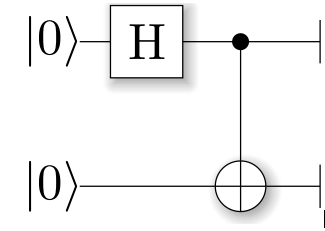



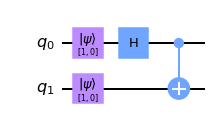

In [35]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
qc1 = QuantumCircuit(2)  # Create a quantum circuit with two qubits
zero_state = [1,0]   # Define |0> (redundant because default)
qc1.initialize(zero_state, 0) # Apply initialisation operation to the 0th qubit
qc1.initialize(zero_state, 1) # Apply initialisation operation to the 1st qubit
qc1.h(0)  # Apply Hadamard gate to first qubit
qc1.cx(0,1)  # Apply CNOT with control on 0 and NOT on 1
qc1.draw()

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


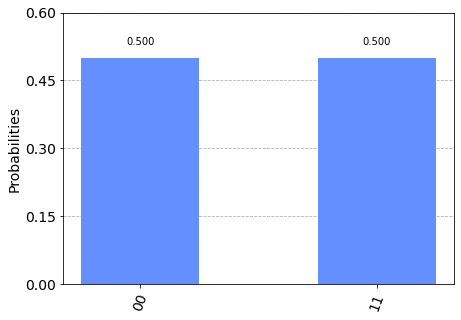

In [36]:
result1 = execute(qc1,backend).result() # Do the simulation, returning the result
out_state = result1.get_statevector()
print(out_state) # Display the output state vector
qc1.measure_all()
qc1.draw()
counts1 = result1.get_counts()
plot_histogram(counts1)

Bell state generator circuit verified above.

## 2. Now add, right before the CNOT gate and for each of the two qubits, an arbitrary “error gate”. By error gate we mean that with a certain probability (that you can decide but must be non-zero for all the choices) you have a 1 qubit unitary which can be either the identity, or the X gate (bit-flip error) or the Z gate (sign-flip error).

Before inserting the errors randomly, let's explore how the different kinds of errors affect the counts to confirm theory. 

(We know identity does nothing physically).

### Applying X to first qubit only -

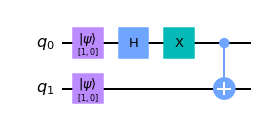

In [43]:
qc_x0 = QuantumCircuit(2)  # Create a quantum circuit with two qubits
zero_state = [1,0]   # Define |0> (redundant because default)
qc_x0.initialize(zero_state, 0) # Apply initialisation operation to the 0th qubit
qc_x0.initialize(zero_state, 1) # Apply initialisation operation to the 1st qubit
qc_x0.h(0)  # Apply Hadamard gate to first qubit
qc_x0.x(0)  # Apply X error gate to first qubit
qc_x0.cx(0,1)  # Apply CNOT with control on 0 and NOT on 1
qc_x0.draw()

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


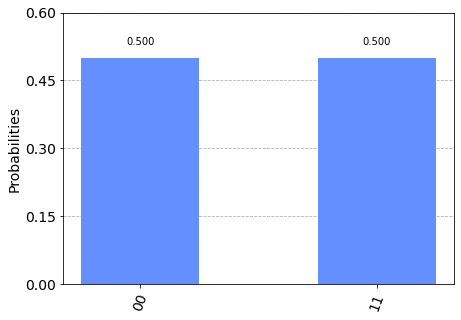

In [44]:
result_x0 = execute(qc_x0,backend).result() # Do the simulation, returning the result
out_state = result_x0.get_statevector()
print(out_state) # Display the output state vector
counts_x0 = result_x0.get_counts()
plot_histogram(counts_x0)

### Applying X to second qubit only -


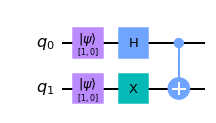

In [45]:
qc_x1 = QuantumCircuit(2)  # Create a quantum circuit with two qubits
zero_state = [1,0]   # Define |0> (redundant because default)
qc_x1.initialize(zero_state, 0) # Apply initialisation operation to the 0th qubit
qc_x1.initialize(zero_state, 1) # Apply initialisation operation to the 1st qubit
qc_x1.h(0)  # Apply Hadamard gate to first qubit
qc_x1.x(1)  # Apply X error gate to second qubit
qc_x1.cx(0,1)  # Apply CNOT with control on 0 and NOT on 1
qc_x1.draw()

[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]


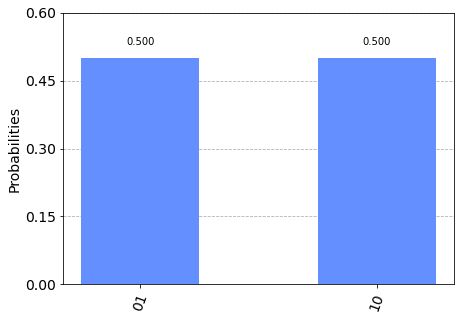

In [46]:
result_x1 = execute(qc_x1,backend).result() # Do the simulation, returning the result
out_state = result_x1.get_statevector()
print(out_state) # Display the output state vector
counts_x1 = result_x1.get_counts()
plot_histogram(counts_x1)

### Applying X to both - 

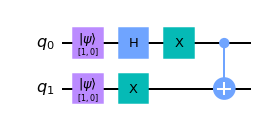

In [47]:
qc1 = QuantumCircuit(2)  # Create a quantum circuit with two qubits
zero_state = [1,0]   # Define |0> (redundant because default)
qc1.initialize(zero_state, 0) # Apply initialisation operation to the 0th qubit
qc1.initialize(zero_state, 1) # Apply initialisation operation to the 1st qubit
qc1.h(0)  # Apply Hadamard gate to first qubit
qc1.x(0)
qc1.x(1)
qc1.cx(0,1)  # Apply CNOT with control on 0 and NOT on 1
qc1.draw()

[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]


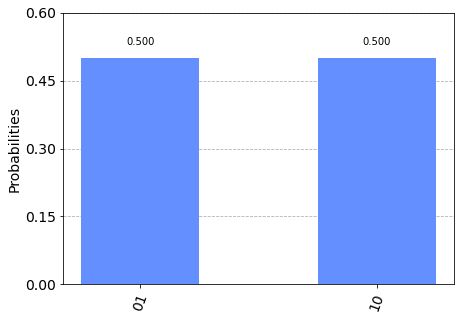

In [48]:
result1 = execute(qc1,backend).result() # Do the simulation, returning the result
out_state = result1.get_statevector()
print(out_state) # Display the output state vector
counts1 = result1.get_counts()
plot_histogram(counts1)

### Applying Z to first qubit - 

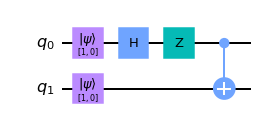

In [49]:
qc1 = QuantumCircuit(2)  # Create a quantum circuit with two qubits
zero_state = [1,0]   # Define |0> (redundant because default)
qc1.initialize(zero_state, 0) # Apply initialisation operation to the 0th qubit
qc1.initialize(zero_state, 1) # Apply initialisation operation to the 1st qubit
qc1.h(0)  # Apply Hadamard gate to first qubit
qc1.z(0)
qc1.cx(0,1)  # Apply CNOT with control on 0 and NOT on 1
qc1.draw()

[ 0.70710678+0.j -0.        +0.j  0.        +0.j -0.70710678+0.j]


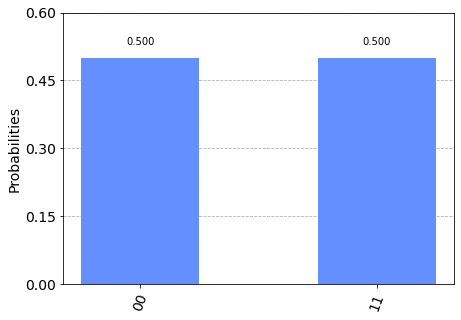

In [50]:
result1 = execute(qc1,backend).result() # Do the simulation, returning the result
out_state = result1.get_statevector()
print(out_state) # Display the output state vector
counts1 = result1.get_counts()
plot_histogram(counts1)

### Applying Z to second only - 


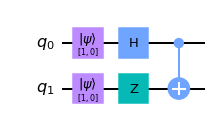

In [51]:
qc1 = QuantumCircuit(2)  # Create a quantum circuit with two qubits
zero_state = [1,0]   # Define |0> (redundant because default)
qc1.initialize(zero_state, 0) # Apply initialisation operation to the 0th qubit
qc1.initialize(zero_state, 1) # Apply initialisation operation to the 1st qubit
qc1.h(0)  # Apply Hadamard gate to first qubit
qc1.z(1)
qc1.cx(0,1)  # Apply CNOT with control on 0 and NOT on 1
qc1.draw()

[ 0.70710678+0.j -0.        +0.j -0.        +0.j  0.70710678+0.j]


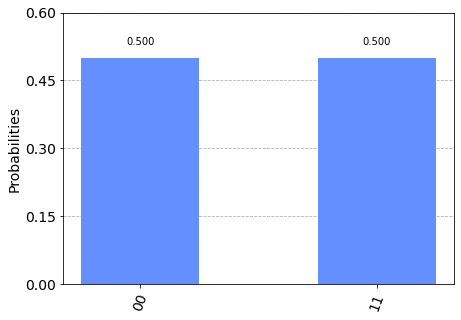

In [52]:
result1 = execute(qc1,backend).result() # Do the simulation, returning the result
out_state = result1.get_statevector()
print(out_state) # Display the output state vector
counts1 = result1.get_counts()
plot_histogram(counts1)

### Applying Z to both - 


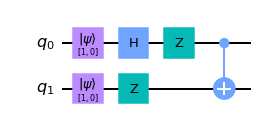

In [61]:
qc1 = QuantumCircuit(2)  # Create a quantum circuit with two qubits
zero_state = [1,0]   # Define |0> (redundant because default)
qc1.initialize(zero_state, 0) # Apply initialisation operation to the 0th qubit
qc1.initialize(zero_state, 1) # Apply initialisation operation to the 1st qubit
qc1.h(0)  # Apply Hadamard gate to first qubit
qc1.z(0)
qc1.z(1)
qc1.cx(0,1)  # Apply CNOT with control on 0 and NOT on 1
qc1.draw()

[ 0.70710678+0.j  0.        -0.j -0.        +0.j -0.70710678+0.j]


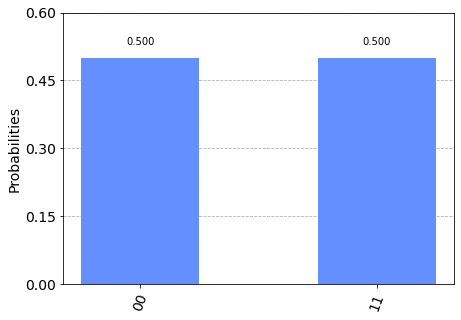

In [62]:
result1 = execute(qc1,backend).result() # Do the simulation, returning the result
out_state = result1.get_statevector()
print(out_state) # Display the output state vector
counts1 = result1.get_counts()
plot_histogram(counts1)

As the gates are unitary, testing further combinations is unnecessary. We have verified that given the conditions, practically, only the bit flip error on the target qubit of the CNOT affects the measurements. Thus using something like Laflamme et al's ["Perfect Quantum Error Correction Code"](https://arxiv.org/pdf/quant-ph/9602019.pdf) would be overkill (10 qubits for 2 logical qubits). 

To make use of the minimal amount of resources, we can just correct the error that affects the result. A point of note is that according to the question, the error gate only acts on the logical qubits, which means it isn't the same as a noisy channel. 

In this case, the desired end result is obtaining a bell state from the first and second qubits. Towards this end, a custom error correcting protocol would be most efficient. Given that the logical qubits always start in the same state, the ancilliary qubit can always start at |1> and then we use Toffoli and CNOT gates as shown in the circuit below to massage any of the possible errors back into a Bell state. 


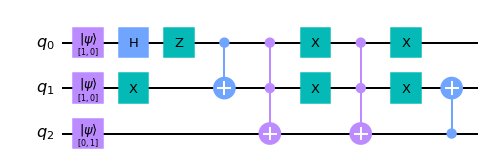

In [109]:
import random

qc = QuantumCircuit(3)  # Create a quantum circuit with three qubits
zero_state = [1,0]   # Define |0> (redundant because default)
one_state = [0,1]   # Define |1> 
qc.initialize(zero_state, 0) # Apply initialisation operation to the 0th qubit
qc.initialize(zero_state, 1) # Apply initialisation operation to the 1st qubit
qc.initialize(one_state, 2) # Apply initialisation operation to the 2nd qubit - used for error correction
qc.h(0)  # Apply Hadamard gate to first qubit
error_0 = random.randint(0,2)
error_1 = random.randint(0,2)
if error_0 == 0:
    qc.x(0)
elif error_0 == 1:
    qc.z(0)
else:
    qc.i(0)
if error_1 == 0:
    qc.x(1)
elif error_1 == 1:
    qc.z(1)
else:
    qc.i(1)
qc.cx(0,1)  # Apply CNOT with control on 0 and NOT on 1
# Error correction part of the circuit
qc.ccx(0,1,2)
qc.x(0)
qc.x(1)
qc.ccx(0,1,2)
qc.x(0)
qc.x(1)
qc.cx(2,1)
qc.draw()

[ 0.70710678+0.j  0.        +0.j -0.        +0.j -0.70710678+0.j
 -0.        +0.j -0.        +0.j  0.        +0.j  0.        +0.j]
{'000': 0.5, '011': 0.5}


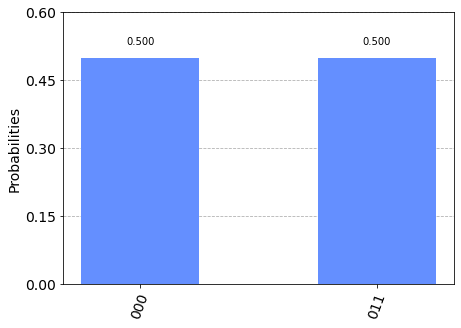

In [98]:
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector
counts = result.get_counts()
plot_histogram(counts)

### Test your solution by making many measurements over the final state and testing that the results are in line with the expectations.

As we can see the logical qubits always end up in a Bell state regardless of the error gates. This can be further verified by running the circuit generation and measurement in a loop.


In [108]:
def run():
    qc = QuantumCircuit(3)  # Create a quantum circuit with three qubits
    zero_state = [1,0]   # Define |0> (redundant because default)
    one_state = [0,1]   # Define |1> 
    qc.initialize(zero_state, 0) # Apply initialisation operation to the 0th qubit
    qc.initialize(zero_state, 1) # Apply initialisation operation to the 1st qubit
    qc.initialize(one_state, 2) # Apply initialisation operation to the 2nd qubit - used for error correction
    qc.h(0)  # Apply Hadamard gate to first qubit
    error_0 = random.randint(0,2)
    error_1 = random.randint(0,2)
    if error_0 == 0:
        qc.x(0)
    elif error_0 == 1:
        qc.z(0)
    else:
        qc.i(0)
    if error_1 == 0:
        qc.x(1)
    elif error_1 == 1:
        qc.z(1)
    else:
        qc.i(1)
    qc.cx(0,1)  # Apply CNOT with control on 0 and NOT on 1
    # Error correction part of the circuit
    qc.ccx(0,1,2)
    qc.x(0)
    qc.x(1)
    qc.ccx(0,1,2)
    qc.x(0)
    qc.x(1)
    qc.cx(2,1)
    result = execute(qc,backend).result() # Do the simulation, returning the result
    counts = result.get_counts()
    return counts

allGood = True
for i in range(100):
    counts = run()
    if (
        len(counts) == 2 # only two bell states
        and (x == 0.5 for x in counts.values())  # both equally probable
        and (x[-2] == x[-1] for x in counts.keys()) # the logical qubits are entangled
    ):
        continue
    else:
        print('BAD RESULT')
        allGood = False
        break

if allGood:
    print('All is Bell!')
    

All is Bell!
